In [1]:
import pandas as pd
import numpy as np

In [21]:
df=pd.read_csv("data.csv",encoding= 'unicode_escape')

In [22]:
df.shape

(541909, 8)

In [23]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [24]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [25]:
df[df['Country']=='United Kingdom']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,12/9/2011 12:31,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,12/9/2011 12:49,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,12/9/2011 12:49,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,12/9/2011 12:49,8.95,13113.0,United Kingdom


we have data of 373 days 

I will do a time series analysis on Monthly,weekly and daily sales in UK

In [26]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [27]:
sales=df['Quantity'] * df['UnitPrice']

In [28]:
df['UnitPrice'].min()

-11062.06

In [29]:
sales.min()

-168469.6

## Sales are negative. Let's see why

In [30]:
df[df["UnitPrice"] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


## The negative values are for Adjusting the bad debt. Also, Customer Ids are NaN values

In [31]:
df[df["CustomerID"].isnull() == True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


## There are several purchases with Customer ID NaN. It's taken care of later.

In [32]:
df['Total_Sales'] = sales

In [33]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


# data preprocessing

In [34]:
cols = ['InvoiceNo','StockCode','Quantity','Description','UnitPrice','CustomerID']
df.drop(cols, axis=1, inplace=True)

In [35]:
df_uk = df[df['Country']=='United Kingdom']

In [36]:
df_uk['Total_Sales'].min()

-168469.6

## we need to do some data cleaning

In [37]:
df.isnull().sum()

InvoiceDate    0
Country        0
Total_Sales    0
dtype: int64

In [39]:
df_uk.head()

,InvoiceDate,Country,Total_Sales
0,12/1/2010 8:26,United Kingdom,15.30
1,12/1/2010 8:26,United Kingdom,20.34
2,12/1/2010 8:26,United Kingdom,22.00
3,12/1/2010 8:26,United Kingdom,20.34
4,12/1/2010 8:26,United Kingdom,20.34


# Removing outliers

<AxesSubplot:xlabel='Total_Sales'>

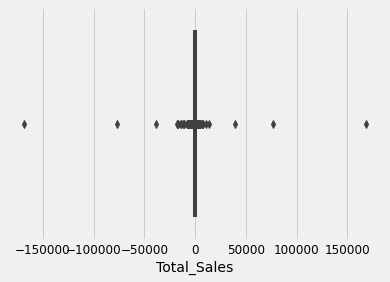

In [40]:
import seaborn as sns
sns.boxplot(df_uk['Total_Sales'])

In [41]:
df_cl=df_uk[df_uk['Total_Sales']>0]

In [42]:
df_uk_clean=df_cl[df_cl['Total_Sales']<10000]

In [43]:
df_uk_clean

,InvoiceDate,Country,Total_Sales
0,12/1/2010 8:26,United Kingdom,15.30
1,12/1/2010 8:26,United Kingdom,20.34
2,12/1/2010 8:26,United Kingdom,22.00
3,12/1/2010 8:26,United Kingdom,20.34
4,12/1/2010 8:26,United Kingdom,20.34
...,...,...,...
541889,12/9/2011 12:31,United Kingdom,23.40
541890,12/9/2011 12:49,United Kingdom,23.60
541891,12/9/2011 12:49,United Kingdom,30.00
541892,12/9/2011 12:49,United Kingdom,214.80


In [44]:
df_uk_clean['Total_Sales'].max()

8142.75

In [45]:
df_uk_clean.InvoiceDate = pd.to_datetime(df_uk_clean.InvoiceDate)

In [46]:
df_uk_clean

,InvoiceDate,Country,Total_Sales
0,2010-12-01 08:26:00,United Kingdom,15.30
1,2010-12-01 08:26:00,United Kingdom,20.34
2,2010-12-01 08:26:00,United Kingdom,22.00
3,2010-12-01 08:26:00,United Kingdom,20.34
4,2010-12-01 08:26:00,United Kingdom,20.34
...,...,...,...
541889,2011-12-09 12:31:00,United Kingdom,23.40
541890,2011-12-09 12:49:00,United Kingdom,23.60
541891,2011-12-09 12:49:00,United Kingdom,30.00
541892,2011-12-09 12:49:00,United Kingdom,214.80


In [47]:
df_uk_clean = df_uk_clean.set_index('InvoiceDate')
df_uk_clean.index

DatetimeIndex(['2010-12-01 08:26:00', '2010-12-01 08:26:00',
               '2010-12-01 08:26:00', '2010-12-01 08:26:00',
               '2010-12-01 08:26:00', '2010-12-01 08:26:00',
               '2010-12-01 08:26:00', '2010-12-01 08:28:00',
               '2010-12-01 08:28:00', '2010-12-01 08:34:00',
               ...
               '2011-12-09 12:31:00', '2011-12-09 12:31:00',
               '2011-12-09 12:31:00', '2011-12-09 12:31:00',
               '2011-12-09 12:31:00', '2011-12-09 12:31:00',
               '2011-12-09 12:49:00', '2011-12-09 12:49:00',
               '2011-12-09 12:49:00', '2011-12-09 12:49:00'],
              dtype='datetime64[ns]', name='InvoiceDate', length=485118, freq=None)

In [48]:
y = df_uk_clean['Total_Sales'].resample('MS').mean()

In [49]:
y

InvoiceDate
2010-12-01    18.732062
2011-01-01    15.534653
2011-02-01    17.304948
2011-03-01    17.975907
2011-04-01    17.467020
2011-05-01    19.456886
2011-06-01    17.925114
2011-07-01    17.101155
2011-08-01    19.592564
2011-09-01    20.083652
2011-10-01    17.604571
2011-11-01    17.106760
2011-12-01    17.977896
Freq: MS, Name: Total_Sales, dtype: float64

In [50]:
y_new=y['2011':]

# The plot shows monthly sales 

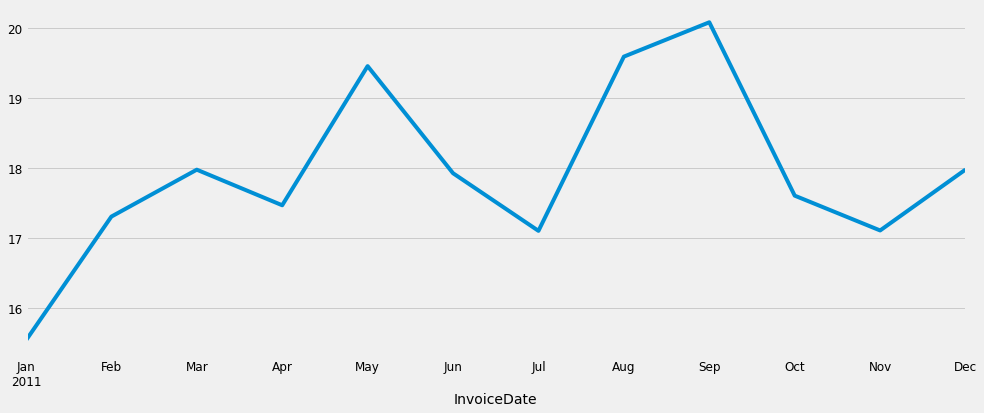

In [51]:
y_new.plot(figsize=(15, 6))
plt.show()

## We can see that the sales are highest in the month of August and September which is right before the holiday season. Perhaps they are getting ready for the holidays and the Winter season. We can also think that it is right after summer vacations and colleges start in this time phrase. Perhaps the students are relocating and shopping for their needs. We also see that there is a high sale going on in the month of May. I think that people are going out on vacation in this time period (because of the summer break) and they are shopping for that.

In [52]:
df_uk_plot=pd.DataFrame(y_new)

In [53]:
df_uk_plot['Total_Sales']

InvoiceDate
2011-01-01    15.534653
2011-02-01    17.304948
2011-03-01    17.975907
2011-04-01    17.467020
2011-05-01    19.456886
2011-06-01    17.925114
2011-07-01    17.101155
2011-08-01    19.592564
2011-09-01    20.083652
2011-10-01    17.604571
2011-11-01    17.106760
2011-12-01    17.977896
Freq: MS, Name: Total_Sales, dtype: float64

In [54]:
df_uk_plot.index

DatetimeIndex(['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01'],
              dtype='datetime64[ns]', name='InvoiceDate', freq='MS')

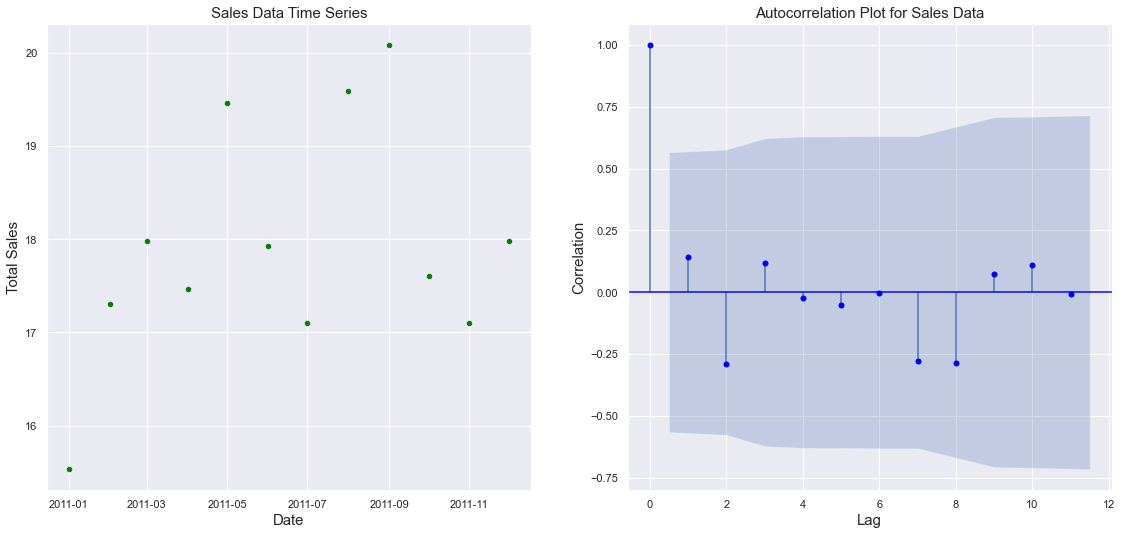

In [55]:
#Plots for monthly data points 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from statsmodels.graphics.tsaplots import plot_acf

fig = plt.figure(figsize=(17,8))
ax1 = fig.add_subplot(121)

plt.scatter(df_uk_plot.index,df_uk_plot['Total_Sales'], color='green',s=20)
plt.title("Sales Data Time Series",fontsize=15)
plt.xlabel("Date",fontsize=15)
plt.ylabel("Total Sales",fontsize=15)


# Plotting the autocorrelation plot
ax2 = fig.add_subplot(122)
plot_acf(df_uk_plot['Total_Sales'], ax=ax2,color='blue')
plt.title("Autocorrelation Plot for Sales Data", fontsize=15)
plt.ylabel("Correlation",fontsize=15)
plt.xlabel("Lag",fontsize=15)
plt.show()


In [43]:
df_uk_clean

,Country,Total_Sales
InvoiceDate,,
2010-12-01 08:26:00,United Kingdom,15.30
2010-12-01 08:26:00,United Kingdom,20.34
2010-12-01 08:26:00,United Kingdom,22.00
2010-12-01 08:26:00,United Kingdom,20.34
2010-12-01 08:26:00,United Kingdom,20.34
...,...,...
2011-12-09 12:31:00,United Kingdom,23.40
2011-12-09 12:49:00,United Kingdom,23.60
2011-12-09 12:49:00,United Kingdom,30.00


In [45]:
y_exp=pd.DataFrame(df_uk_clean['Total_Sales'].resample('1D').mean())

In [46]:
df_new=pd.DataFrame(y_exp['Total_Sales'],y_exp.index)

In [47]:
df_new.reset_index(inplace=True)

In [48]:
df_new.fillna(0, inplace = True)

In [49]:
df_new

,InvoiceDate,Total_Sales
0,2010-12-01,18.728418
1,2010-12-02,23.193823
2,2010-12-03,21.032938
3,2010-12-04,0.000000
4,2010-12-05,10.437303
...,...,...
369,2011-12-05,16.531822
370,2011-12-06,17.230301
371,2011-12-07,28.422404
372,2011-12-08,16.738515


In [50]:
#fig = plt.figure(figsize=(17,8))
#ax1 = fig.add_subplot(121)
df_sales_sum = df_new.groupby(by=['InvoiceDate'], as_index=False)['Total_Sales'].sum()


In [70]:
df_sales_sum

,InvoiceDate,Total_Sales
0,2010-12-01,18.728418
1,2010-12-02,23.193823
2,2010-12-03,21.032938
3,2010-12-04,0.000000
4,2010-12-05,10.437303
...,...,...
369,2011-12-05,16.531822
370,2011-12-06,17.230301
371,2011-12-07,28.422404
372,2011-12-08,16.738515


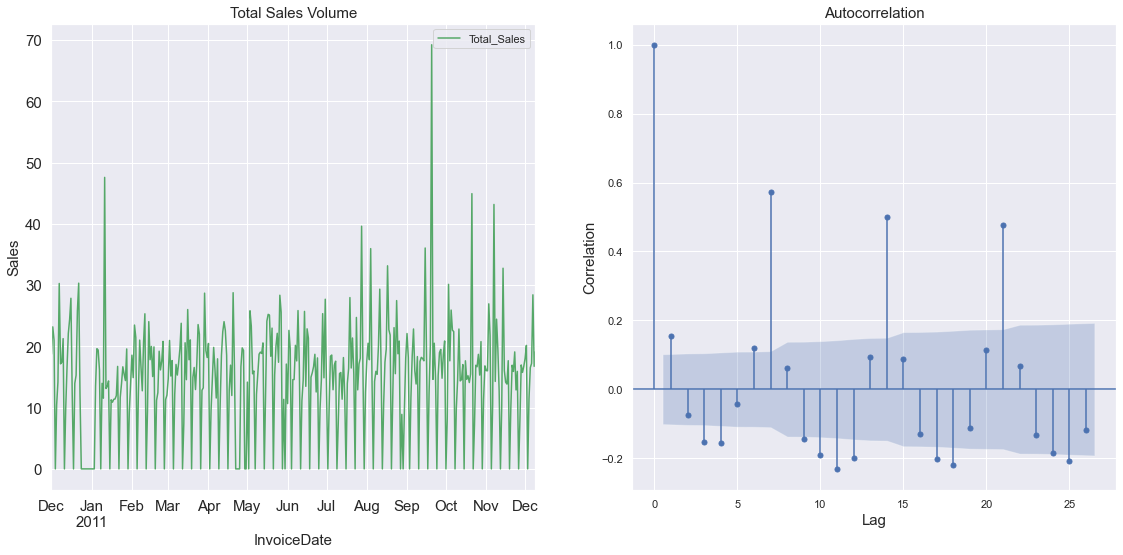

In [60]:
#plot for daily data points
fig = plt.figure(figsize=(17,8))
ax1 = fig.add_subplot(121)
df_sales_sum['InvoiceDate'] = pd.to_datetime(df_sales_sum['InvoiceDate'])
df_sales_sum.plot(x='InvoiceDate',y='Total_Sales',color="g",ax=ax1, fontsize=15)
plt.xlabel('InvoiceDate',fontsize=15)
plt.title("Total Sales Volume", fontsize=15) #time series
plt.ylabel("Sales", fontsize=15)
#date_form = mdates.DateFormatter("%Y-%m-%d")
#year_locator = mdates.YearLocator()
#ax1.xaxis.set_major_locator(year_locator)
ax2 = fig.add_subplot(122)
plot_acf(df_sales_sum.Total_Sales,ax=ax2)
plt.title("Autocorrelation", fontsize=15)
plt.xlabel("Lag",fontsize=15)
plt.ylabel("Correlation", fontsize=15)

plt.show()

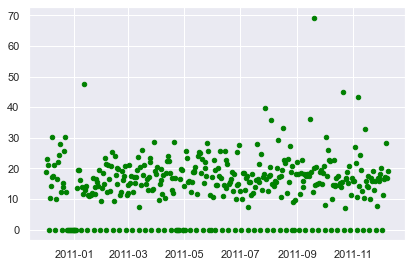

In [61]:
plt.scatter(df_sales_sum['InvoiceDate'],df_sales_sum['Total_Sales'], color='green',s=20)

In [54]:
df_uk_clean1=df_uk_clean

In [55]:
df_uk_clean1

,Country,Total_Sales
InvoiceDate,,
2010-12-01 08:26:00,United Kingdom,15.30
2010-12-01 08:26:00,United Kingdom,20.34
2010-12-01 08:26:00,United Kingdom,22.00
2010-12-01 08:26:00,United Kingdom,20.34
2010-12-01 08:26:00,United Kingdom,20.34
...,...,...
2011-12-09 12:31:00,United Kingdom,23.40
2011-12-09 12:49:00,United Kingdom,23.60
2011-12-09 12:49:00,United Kingdom,30.00


In [56]:
df_uk_clean1.reset_index(inplace=True)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


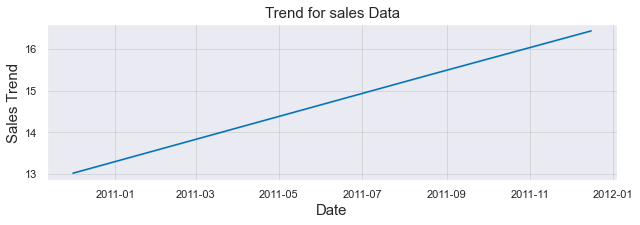

In [267]:
from fbprophet import Prophet
from datetime import datetime
m = Prophet()
ds = df_sales_sum["InvoiceDate"].dt.tz_localize(None)
y = df_sales_sum['Total_Sales']
df_for_prophet = pd.DataFrame(dict(ds=ds,y=y))
m.fit(df_for_prophet)
future = m.make_future_dataframe(periods=)
forecast = m.predict(future)
forecast = forecast[["ds","trend", "trend_lower", "trend_upper"]]
fig = m.plot_components(forecast,plot_cap=False)
trend_ax = fig.axes[0]
trend_ax.plot()
plt.title("Trend for sales Data", fontsize=15)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Sales Trend", fontsize=15)

plt.show()

The sales performance shows an almost perfectly linear upward trend.The practical interpretation of these results require other metrics like churn, and potential increase in costs, so an upward trend does not necessarily mean that the profits increased. However, the trend is a good indicator of overall performance once all the factors are considered.

ARIMA REGRESSION

ARIMA or Auto-regressive Integrated Moving Average is a time series model that aims to describe the auto-correlations in the time series data. It works well for short-term predictions and it can be useful to provide forecasted values for user-specified periods showing good results for demand, sales, planning, and production.

MSE error: 125.58814963491972


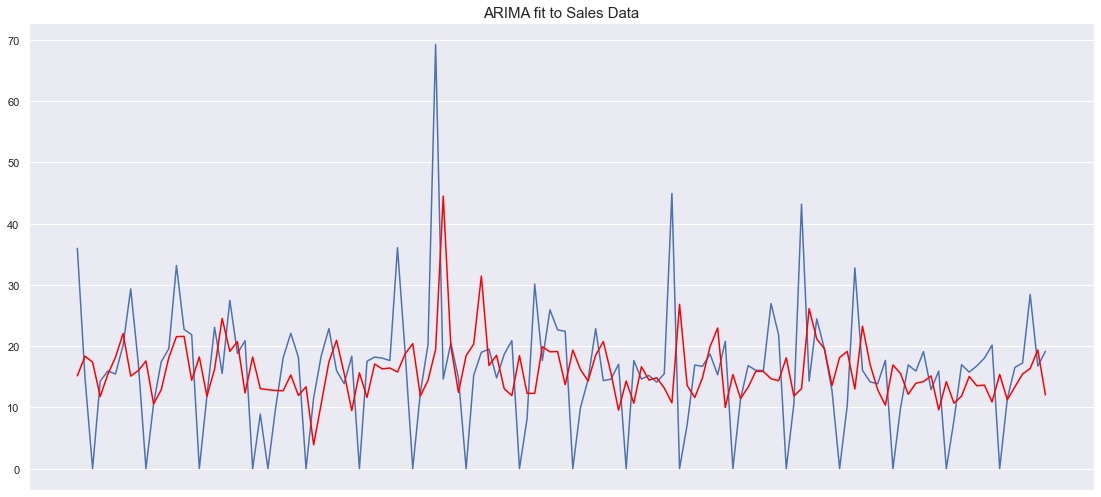

In [268]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()



X = df_sales_sum["Total_Sales"].values

split = int(0.66*len(X))
train, test = X[0:split], X[split:]

history = [x for x in train]
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    
    obs = test[t]
    history.append(obs)
mse = mean_squared_error(test, predictions)

print(f"MSE error: {mse}")

plt.figure(figsize=(17,8))
plt.plot(test)
plt.plot(predictions, color='red')
plt.title("ARIMA fit to Sales Data",fontsize=15)
plt.xticks([])
plt.show()

Analysis on Weekly Data

In [74]:
Wprices_df = pd.DataFrame(df_uk_clean.groupby("InvoiceDate").Total_Sales.sum())
Wprices_df = Wprices_df.iloc[:-1]
Wprices_df

,Total_Sales
InvoiceDate,
2010-12-01 08:26:00,139.12
2010-12-01 08:28:00,22.20
2010-12-01 08:34:00,348.78
2010-12-01 08:35:00,17.85
2010-12-01 09:00:00,204.00
...,...
2011-12-09 12:20:00,145.29
2011-12-09 12:21:00,29.88
2011-12-09 12:23:00,124.60


In [76]:
weekly_prices = Wprices_df.resample("W").sum()
weekly_prices.head()

,Total_Sales
InvoiceDate,
2010-12-05,169550.50
2010-12-12,290010.70
2010-12-19,198597.17
2010-12-26,76569.28
2011-01-02,0.00


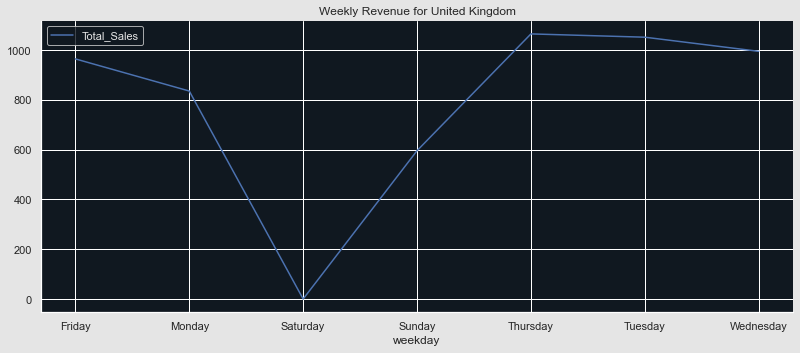

In [273]:
fig, ax = plt.subplots(figsize = (12, 5), facecolor = "#e5e5e5")
ax.set_facecolor("#101820")

weekly_data.plot(ax = ax).set_title("Weekly Revenue for United Kingdom")
ax.legend(facecolor = "#101820", labelcolor = "#e5e5e5")

sns.despine()
plt.show()

No sale on Saturdays perhaps Store is closed on saturdays , Highest sale is on Thursdays and Tuesdays. 

,Total_Sales
InvoiceDate,
2010-12-01,18.728418
2010-12-02,23.193823
2010-12-03,21.032938
2010-12-04,0.000000
2010-12-05,10.437303
...,...
2011-12-05,16.531822
2011-12-06,17.230301
2011-12-07,28.422404


In [122]:
df_sales_sum1=df_sales_sum.set_index('InvoiceDate')

In [270]:
df_sales_sum1["weekday"] = df_sales_sum1.index.day_name()
df_sales_sum1

,Total_Sales,weekday
InvoiceDate,,
2010-12-01,18.728418,Wednesday
2010-12-02,23.193823,Thursday
2010-12-03,21.032938,Friday
2010-12-04,0.000000,Saturday
2010-12-05,10.437303,Sunday
...,...,...
2011-12-05,16.531822,Monday
2011-12-06,17.230301,Tuesday
2011-12-07,28.422404,Wednesday


In [126]:
df_sales_sum1[df_sales_sum1.Total_Sales == 0].weekday.value_counts()

Saturday     53
Monday        6
Friday        4
Sunday        3
Thursday      1
Tuesday       1
Wednesday     1
Name: weekday, dtype: int64

In [272]:
weekly_data=df_sales_sum1.groupby("weekday").Total_Sales.sum()

An important insight from this information could be that stores shouldn't send out promotional offers and deals on friday

In [239]:
df_sales_sum1

,Total_Sales,weekday
InvoiceDate,,
2010-12-01,18.728418,Wednesday
2010-12-02,23.193823,Thursday
2010-12-03,21.032938,Friday
2010-12-04,0.000000,Saturday
2010-12-05,10.437303,Sunday
...,...,...
2011-12-05,16.531822,Monday
2011-12-06,17.230301,Tuesday
2011-12-07,28.422404,Wednesday


In [240]:
daily_data = df_sales_sum1[["Total_Sales"]].dropna().reset_index()
daily_data.columns = ["ds", "y"]


In [241]:
train_size = int(0.85 * len(daily_data))

train = daily_data.iloc[:train_size]
val = pd.DataFrame(daily_data.iloc[train_size:])


In [242]:
christmas = pd.DataFrame(
    {
        "holiday": "christmas",
        "ds": pd.to_datetime(["2011-12-24", "2012-12-25", "2013-11-26"]),
        "lower_window": 0,
        "upper_window": 1
    }
)

In [243]:
christmas

,holiday,ds,lower_window,upper_window
0,christmas,2011-12-24,0,1
1,christmas,2012-12-25,0,1
2,christmas,2013-11-26,0,1


In [244]:
def is_saturday(ds):
    date = pd.to_datetime(ds)
    return date.day_name() == "Saturday"

daily_data["is_saturday"] = daily_data["ds"].apply(is_saturday)
train = daily_data.iloc[:train_size]
val = pd.DataFrame(daily_data.iloc[train_size:])


In [245]:
daily_data

,ds,y,is_saturday
0,2010-12-01,18.728418,False
1,2010-12-02,23.193823,False
2,2010-12-03,21.032938,False
3,2010-12-04,0.000000,True
4,2010-12-05,10.437303,False
...,...,...,...
369,2011-12-05,16.531822,False
370,2011-12-06,17.230301,False
371,2011-12-07,28.422404,False
372,2011-12-08,16.738515,False


In [246]:
train_size = int(0.90 * len(daily_data))

train = daily_data.iloc[:train_size]
val = pd.DataFrame(daily_data.iloc[train_size:])

print(f"Training Days:\t\t{len(train)} \nValidation Days:\t {len(val)}")

Training Days:		336 
Validation Days:	 38


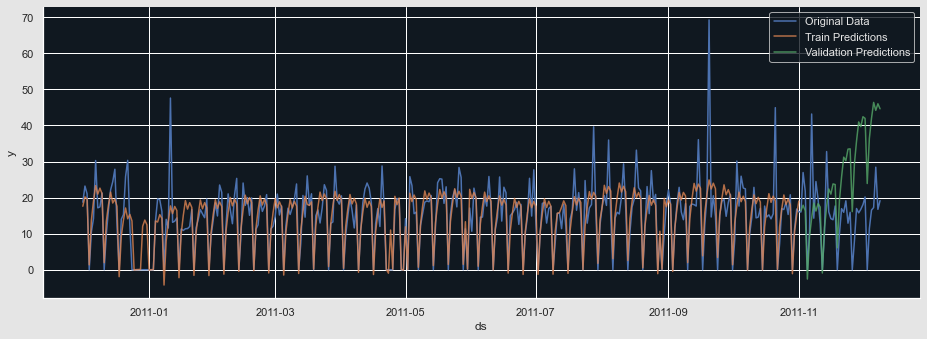

In [248]:
fig, ax = plt.subplots(figsize = (14, 5), facecolor = "#e5e5e5")
ax.set_facecolor("#101820")

sns.lineplot(x = daily_data.ds, y = daily_data.y, ax = ax, label = "Original Data")
sns.lineplot(x = train_pred.ds, y = train_pred.yhat, alpha = 0.8, ax = ax, label = "Train Predictions")
sns.lineplot(x = val_pred.ds, y = val_pred.yhat, ax = ax, alpha = 0.8, label = "Validation Predictions")

ax.legend(labelcolor = "#e5e5e5", facecolor = "#101820")
sns.despine()
plt.show()

We can not detect sudden trends and don't know the reason behind this  since we have only one year data.

What's the most popular product? 

In [ ]:
df1=pd.read_csv("data.csv",encoding= 'unicode_escape')

In [87]:
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [100]:
df2=df1[df1['Country']=='United Kingdom']

In [136]:
df_stock=df2['StockCode'].value_counts()

In [110]:
df3=df2[df2['StockCode']=='85123A']

In [114]:
df3

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 9:02,2.55,17850.0,United Kingdom
66,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 9:32,2.55,17850.0,United Kingdom
220,536390,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,12/1/2010 10:19,2.55,17511.0,United Kingdom
262,536394,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,12/1/2010 10:39,2.55,13408.0,United Kingdom
...,...,...,...,...,...,...,...,...
539342,581439,85123A,CREAM HANGING HEART T-LIGHT HOLDER,1,12/8/2011 16:30,5.79,NaN,United Kingdom
539979,581452,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,12/8/2011 18:03,2.55,17675.0,United Kingdom
540217,581472,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/8/2011 19:55,2.95,15796.0,United Kingdom
540837,581492,85123A,CREAM HANGING HEART T-LIGHT HOLDER,3,12/9/2011 10:03,5.79,NaN,United Kingdom


T-light Holder is the most popular product in stores in UK ,Which are mostly used in romanctic and festive occassions.   

As we see from our daily, monthly and weekly analysis , that around holidays stores in UK have highest increase in revenue, we can stock up on popular products and increase the prices to generate more revenue. Moreover the stores can send out promotional offers on Sunday or Wednesday as the days where people seem to shop the most is Tuesday and Thursday. 